In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
population = pd.read_csv('../BDD/population.csv')
energy = pd.read_csv('../BDD/energy.csv')
gdp = pd.read_csv('../BDD/world-gdp-over-the-last-two-millennia.csv', sep=';')
gpec = pd.read_csv('../BDD/global-energy-substitution.csv')
total = gpec['Wind (TWh; substituted energy)']+gpec['Oil (TWh; substituted energy)']+gpec['Nuclear (TWh; substituted energy)']+ gpec['Hydropower (TWh; substituted energy)']+gpec['Traditional bimass (TWh; substituted energy)']+gpec['Other renewables (TWh; substituted energy)']+gpec['Biofuels (TWh; substituted energy)']+gpec['Solar (TWh; substituted energy)']+ gpec['Coal (TWh; substituted energy)']+gpec['Gas (TWh; substituted energy)']
gpec['Total (TWh)']=total
gpec.head()

,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy),Total (TWh)
0,World,OWID_WRL,1800,0,0,0,0,5556,0,0,0,97,0,5653
1,World,OWID_WRL,1810,0,0,0,0,5833,0,0,0,128,0,5961
2,World,OWID_WRL,1820,0,0,0,0,6111,0,0,0,153,0,6264
3,World,OWID_WRL,1830,0,0,0,0,6389,0,0,0,264,0,6653
4,World,OWID_WRL,1840,0,0,0,0,6944,0,0,0,356,0,7300


In [2]:
population[population.Code == 'OWID_WRL']
energy[energy.Code == 'OWID_WRL']
gdp[gdp.Code == 'OWID_WRL']

int = pd.merge(gdp[gdp.Code == 'OWID_WRL'],gpec[gpec.Code == 'OWID_WRL'], on=['Year'] )
complete_data = pd.merge(int, gdp, on=['Year'])
complete_data.head()
int.head()

,Entity_x,Code_x,Year,World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017)),Population,Entity_y,Code_y,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy),Total (TWh)
0,World,OWID_WRL,1820,1.202361e+12,989818304,World,OWID_WRL,0,0,0,0,6111,0,0,0,153,0,6264
1,World,OWID_WRL,1870,1.923917e+12,1262682112,World,OWID_WRL,0,6,0,0,6944,0,0,0,1642,0,8592
2,World,OWID_WRL,1900,3.418754e+12,1650000000,World,OWID_WRL,0,181,0,44,6111,0,0,0,5728,64,12128
3,World,OWID_WRL,1940,7.806369e+12,2300000000,World,OWID_WRL,0,2653,0,504,7222,0,0,0,11586,875,22840
4,World,OWID_WRL,1950,9.251063e+12,2536431104,World,OWID_WRL,0,5444,0,877,7500,0,0,0,12603,2092,28516


In [3]:
time = int['Year']
gdp = int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))']
energy = int['Total (TWh)']

In [4]:
def derivee(t, y) :
    der = []
    n=len(t)-2
    for i in range(2,n) : 
        der.append((y[i+2]-y[i-2])/(t[i+2]-t[i-2]))
    return t[2:n], np.array(der)

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']

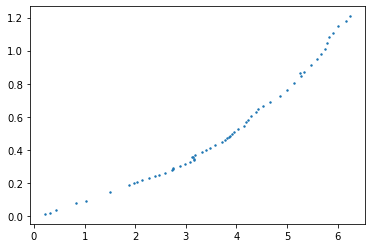

In [5]:
plt.scatter(energy, gdp, s=2)

In [6]:
import regressions as reg

def piecewise_regression(xdata, ydata, step = 2) :
    n = len(xdata)

    r1, y1 = reg.linReg(xdata[0:step+1], ydata[0:step+1])
    linLoss = reg.linLoss(xdata[0:step], ydata[0:step], r1, y1)

    r2, y2= reg.expReg(xdata[step:], ydata[step:])
    expLoss = reg.expLoss(xdata[step:], ydata[step:], r2, y2)

    loss = linLoss+expLoss
    lim = step

    for i in range (step, n, step) :
        rlin, ylin = reg.linReg(xdata[0:i], ydata[0:i])
        rexp, yexp = reg.expReg(xdata[i:], ydata[i:])
        linLoss = reg.linLoss(xdata[0:i], ydata[0:i], rlin, ylin)
        expLoss = reg.expLoss(xdata[i:], ydata[i:], rexp, yexp)
        if expLoss+linLoss < loss : 
            loss = expLoss+linLoss
            r1, y1 = rlin, ylin
            r2, y2 = rexp, yexp
            lim = i
    return lim, (r1, y1), (r2, y2)

piecewise_regression(gdp, energy, 1)

C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(27,
 (8.432224192021724, 0.25445310149647904),
 (0.7129214819319067, 2.7716457371351577))

In [7]:
a, xlim, r, y0 = reg.linExpReg(gdp, energy, p0 = (8.54249090463964, gdp[21],0.6 , 2.6345032080655955))
xlim

0.42642366706333584

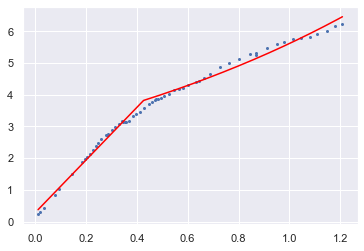

In [8]:
import seaborn as sns 
sns.set_theme()
plt.scatter(gdp, energy, s=4)
xplot = np.linspace(gdp.min(),gdp.max(), 200)
plt.plot(xplot, reg.lin_exp(xplot,a, xlim, r, y0 ), color='red')


In [9]:
a, xlim, r, y0 = reg.linPowReg(gdp, energy, p0 = (0.0010959084284438464, gdp[5], 4, 1))

Text(0.5, 0, 'GDP (10e14 $)')

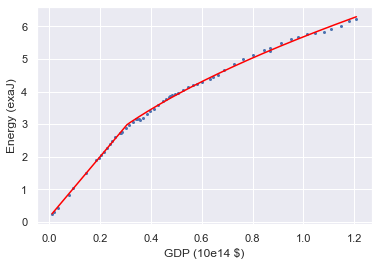

In [10]:
plt.scatter(gdp, energy, s=4)
xplot = np.linspace(gdp.min(),gdp.max(), 200)
plt.plot(xplot, reg.lin_pow(xplot, a, xlim, r, y0 ), color='red')
plt.ylabel("Energy (exaJ)")
plt.xlabel("GDP (10e14 $)")

In [11]:
dsit = np.array([abs(gdp[i]-xlim) for i in range (len(gdp))])
dsit.argmin()


17

(1989, 0.08797586854530871, 9.999725341796875, 0.00020887643972838623, 0.00010691374810506373, 7.301728766461077e-05)


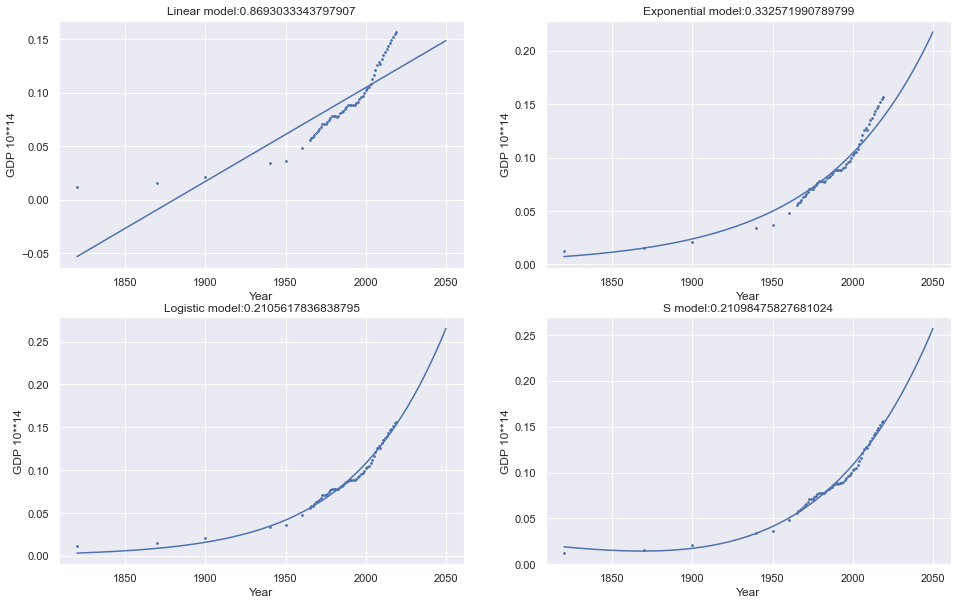

In [12]:
import visualization as visu
population= int['Population']
gdp  = int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))']/10**5
visu.test_models(time, gdp/population, logbounds = [0,2150], xmin= 1820, xmax=2050, x_title='Year', y_title='GDP 10**14')

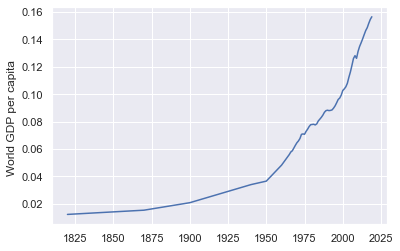

In [13]:
plt.ylabel("World GDP per capita ")
plt.plot(time, gdp/population)

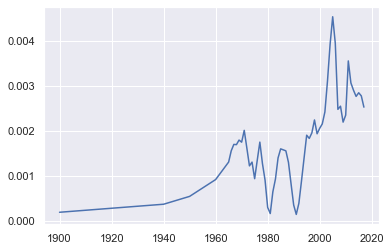

In [14]:
year, der = derivee(time, gdp/population)
plt.plot(year, der )

In [51]:
year=int['Year']
y0, r, a, m, t1, t2 =reg.expLinLin(year, gdp/population, p0 =(0.00973, 2*10**-10, 0.0012, 0.0014,1950, 1975 ))

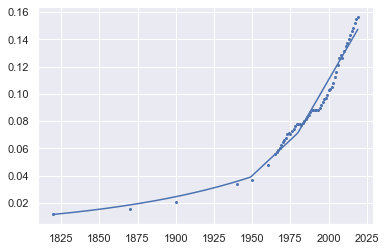

In [52]:
xplot = np.linspace(year.min(), year.max(), 200)
plt.scatter(year, gdp/population, s=4)
plt.plot(xplot, reg.exp_lin_lin(xplot,y0, r, a, m, t1, t2  ))

In [50]:
y = gdp/population
reg.expReg(year[:6],y[:6] )

(0.009739984589980143, 2.1279817374363948e-10)